In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [3]:
math_data = pd.read_csv("C:\\Users\\goldi\\Desktop\\student-mat.csv", sep=';')

In [4]:
math_data['pass'] = np.where(math_data['G3'] >= 10, 1, 0)

In [5]:
math_data = math_data.drop(columns=['G3', 'G1', 'G2'])

In [6]:
math_data = pd.get_dummies(math_data, drop_first=True)

In [7]:
X = math_data.drop(columns=['pass'])
y = math_data['pass']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [12]:
top_features = feature_importances.sort_values(by='importance', ascending=False).head(5)
print("Top 5 features:\n", top_features)


Top 5 features:
      feature  importance
12  absences    0.091036
5   failures    0.073190
0        age    0.058378
8      goout    0.057516
7   freetime    0.042473


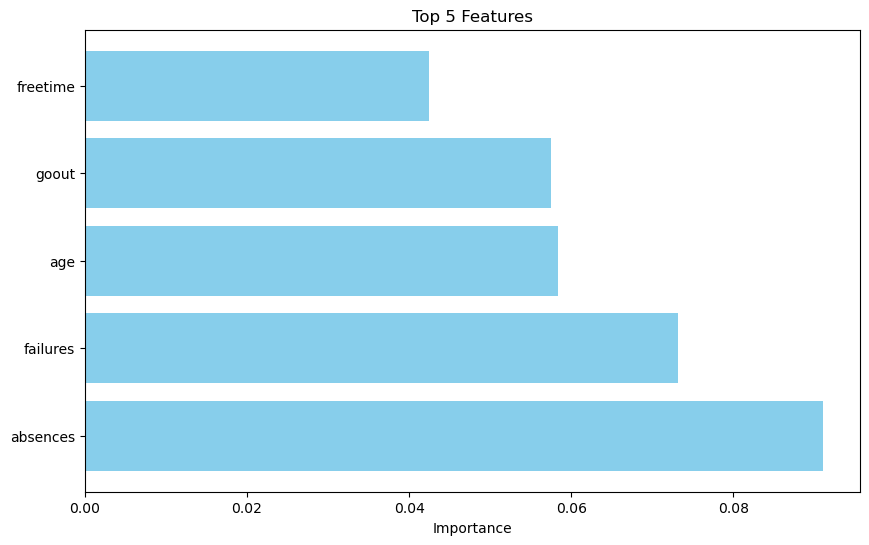

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Features')
plt.show()

In [14]:
top_5_feature_names = top_features['feature'].values
X_train_top5 = X_train_scaled[:, [X.columns.get_loc(c) for c in top_5_feature_names]]
X_test_top5 = X_test_scaled[:, [X.columns.get_loc(c) for c in top_5_feature_names]]

In [15]:
rf_model_top5 = RandomForestClassifier(random_state=42)
rf_model_top5.fit(X_train_top5, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred_top5 = rf_model_top5.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, y_pred_top5)
print(f"Accuracy with top 5 features: {accuracy_top5:.4f}")


Accuracy with top 5 features: 0.6582


In [17]:
top5_scaler = StandardScaler()
top5_scaler.fit(X_train_top5)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(top5_scaler, file)

with open('project_model.pkl', 'wb') as file:
    pickle.dump(rf_model_top5, file)

print("Top 5 feature model and scaler saved successfully!")

Top 5 feature model and scaler saved successfully!
